### Newton's method

Find roots with **Newton's method** for:


1) $\:f(x) = x\,cos(x) - x^2 \:\:\:  x_0 = 1$

2) $\:f(x) = x^3 - 7x^2 + 8x - 3 \:\:\: x_0 = 5 $

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
config = tf.ConfigProto()
config.gpu_options.allow_growth = True
config.gpu_options.per_process_gpu_memory_fraction = 0.1

In [3]:
sess = tf.Session(config=config)

In [4]:
x = tf.placeholder(tf.float32, name="x")
y = x * tf.cos(x) - x**2
grad_y = tf.gradients(y, x, name="grad_y_wrt_x")

W0718 08:33:19.669998 139723471865664 deprecation.py:323] From /home/yeva/anaconda3/lib/python3.7/site-packages/tensorflow/python/ops/math_grad.py:1205: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [5]:
iterations = 20
xs = [1]

for _ in range(iterations):
    current_x = xs[-1]
    next_x = current_x - sess.run(y/grad_y[0], {x: current_x})
    xs.append(next_x)


In [6]:
print("root :", xs[-1])

root : 0.7390851553427638


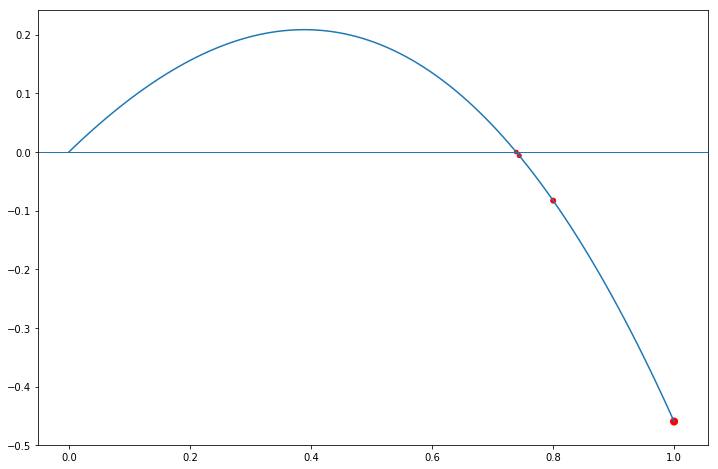

In [7]:
plt.figure(figsize=(12, 8))

X = np.linspace(0, 1, 100)

plt.plot(X, sess.run(y, {x: X}), label="function")
plt.scatter(xs, sess.run(y, {x: xs}), 
            s = 50/np.arange(1, 1+len(xs)), c="red")

plt.axhline(y=0, linewidth=1)

In [8]:
print("root :", xs[-1])

root : 0.7390851553427638


In [9]:
a = tf.placeholder(tf.float32, name="a")
b = a**3 - 7*a**2 + 8*a - 3

In [10]:
grad_b = tf.gradients(b, a, name="grad_b_wrt_a")

In [11]:
iterations = 20
a_sol = [5]

for _ in range(iterations):
    current_a = a_sol[-1]
    next_a = current_a - sess.run(b/grad_b[0], {a: current_a})
    a_sol.append(next_a)
  

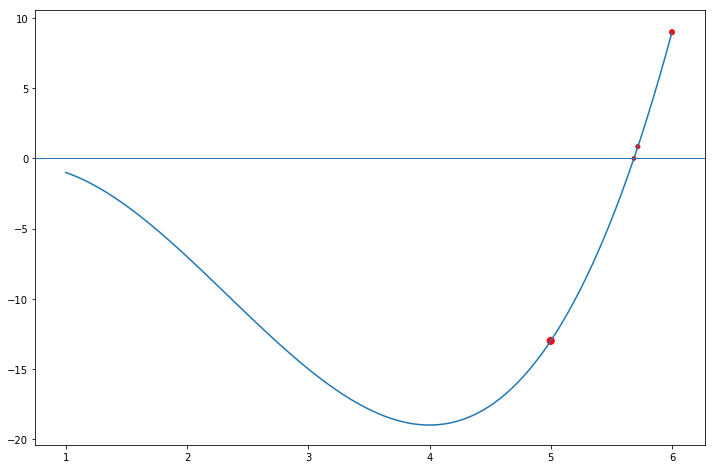

In [12]:
plt.figure(figsize=(12, 8))

A = np.linspace(1, 6, 100)

plt.plot(A, sess.run(b, {a: A}), label="function")
plt.scatter(a_sol, sess.run(b, {a: a_sol}), 
            s = 50/np.arange(1, 1+len(xs)), c="red")

plt.axhline(y=0, linewidth=1)

In [13]:
print("root :", a_sol[-1])

root : 5.6857793614010745


### Softmax

$$\text{softmax}(x)_i = \frac{\exp(x_i)}{\sum_j \exp(x_j)}$$

In [14]:
def softmax(sess, x):
    """
    param sess: tf.Session
    param x:  np.array, n-dimentional vector
    returns: np.array n-dimentional vector
    """
    vector = tf.placeholder(tf.float32)
    soft = tf.exp(vector) / tf.reduce_sum(tf.exp(vector))
    
    return soft.eval(feed_dict={vector:x}, session=sess)

In [15]:
# test
import tensorflow as tf
import numpy as np

In [16]:
with tf.Session() as sess:
    if np.allclose([0.0320586, 0.08714432, 0.23688282, 0.64391426],
                   softmax(sess, np.array([1, 2, 3, 4]))):
        print("Test passed!")
    else:
        print("Test failed!")

Test passed!


$$\text{softmax}(X)_{ij} = \frac{\exp(X_{ij})}{\sum_j \exp(X_{ij})}$$

In [17]:
def softmax_matrix(sess, x):
    """
    Computes softmax for each row vector in matrix.
    
    param sess: tf.Session
    param x:  np.array, (n x m) matrix
    returns: np.array, (n x m) matrix
    """
    matrix = tf.placeholder(tf.float32)
    soft_mat = tf.exp(matrix) / tf.reduce_sum(
        tf.exp(matrix), axis=1, keepdims=True)
    
    return soft_mat.eval(feed_dict={matrix:x}, session=sess)

In [18]:
with tf.Session() as sess:
    if np.allclose([[0.10650698, 0.78698604, 0.10650698],
                    [0.09003057, 0.24472847, 0.66524096]],
                   softmax_matrix(sess, np.array([[1,3,1], [-1, 0, 1]]))):
        print("Test passed!")
    else:
        print("Test failed!")
    

Test passed!
